In [1]:
import os, glob
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
 %config InlineBackend.figure_format = 'retina'
 plt.rcParams['figure.figsize'] = (24, 6) # redefine the default size of the plots
 plt.rcParams['font.family'] = 'DejaVu Sans'
 plt.style.use('ggplot')

In [4]:
data_dir = ''
temperature = pd.read_csv(
    os.path.join(data_dir, '20191119_clementinum_temperature.csv'),
    names=['year', 'month', 'day', 'temperature_avg', 'temperature_max', 'temperature_min', 'rainfall', 'flag'],
    header=1
)

In [5]:
temperature.head()

,year,month,day,temperature_avg,temperature_max,temperature_min,rainfall,flag
0,1775,1,2,-2.2,-1.4,-5.8,0.3,NaN
1,1775,1,3,-1.0,0.6,-2.2,0.0,NaN
2,1775,1,4,0.1,2.5,-3.6,1.2,NaN
3,1775,1,5,2.2,3.0,1.6,0.0,NaN
4,1775,1,6,3.2,4.0,1.6,0.3,NaN


In [6]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89118 entries, 0 to 89117
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             89118 non-null  int64  
 1   month            89118 non-null  int64  
 2   day              89118 non-null  int64  
 3   temperature_avg  89118 non-null  float64
 4   temperature_max  89118 non-null  float64
 5   temperature_min  89118 non-null  float64
 6   rainfall         78758 non-null  float64
 7   flag             5740 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 5.4+ MB


In [7]:
temperature.describe()

,year,month,day,temperature_avg,temperature_max,temperature_min,rainfall
count,89118.000000,89118.000000,89118.000000,89118.000000,89118.000000,89118.000000,78758.000000
mean,1896.502065,6.523093,15.729505,9.725833,13.220953,6.241437,1.291231
std,70.435799,3.448664,8.799927,8.337472,9.366338,7.565105,3.635070
min,1775.000000,1.000000,1.000000,-24.800000,-21.500000,-27.600000,0.000000
25%,1836.000000,4.000000,8.000000,3.300000,5.600000,1.000000,0.000000
50%,1896.500000,7.000000,16.000000,9.900000,13.400000,6.400000,0.000000
75%,1957.750000,10.000000,23.000000,16.700000,20.900000,12.500000,0.800000
max,2018.000000,12.000000,31.000000,31.900000,37.800000,24.000000,90.000000


In [8]:
temperature['flag'].unique().tolist()

[nan, 'T']

In [9]:
temperature_cleaned = (
    temperature
    .drop('flag', axis='columns')
    .set_index(pd.to_datetime(temperature[['year', 'month', 'day']]))
)

temperature_cleaned.tail(2)

,year,month,day,temperature_avg,temperature_max,temperature_min,rainfall
2018-12-30,2018,12,30,6.1,7.5,3.3,0.3
2018-12-31,2018,12,31,6.0,7.5,4.7,0.0


In [10]:
available_years = len(temperature['year'].unique())

f"Years with at least one entry: {available_years}     " \
f"Oldest entry: {temperature['year'].min()}     " \
f"Newest entry: {temperature['year'].max()}"

'Years with at least one entry: 244     Oldest entry: 1775     Newest entry: 2018'

In [11]:
interesting_year = 2018
is_inspected_year = temperature_cleaned['year'] == interesting_year
is_inspected_year

1775-01-02    False
1775-01-03    False
1775-01-04    False
1775-01-05    False
1775-01-06    False
              ...  
2018-12-27     True
2018-12-28     True
2018-12-29     True
2018-12-30     True
2018-12-31     True
Name: year, Length: 89118, dtype: bool

In [12]:
temperature_2018 = temperature_cleaned[is_inspected_year]
temperature_2018.head(2)

,year,month,day,temperature_avg,temperature_max,temperature_min,rainfall
2018-01-01,2018,1,1,7.0,10.1,4.9,0.0
2018-01-02,2018,1,2,6.1,7.6,3.8,0.1


In [13]:
rainfall_temperature_columns = ['temperature_avg', 'rainfall']
temperature_rainfall_2018 = temperature_cleaned.loc[is_inspected_year, rainfall_temperature_columns]
temperature_rainfall_2018.head(2)

,temperature_avg,rainfall
2018-01-01,7.0,0.0
2018-01-02,6.1,0.1


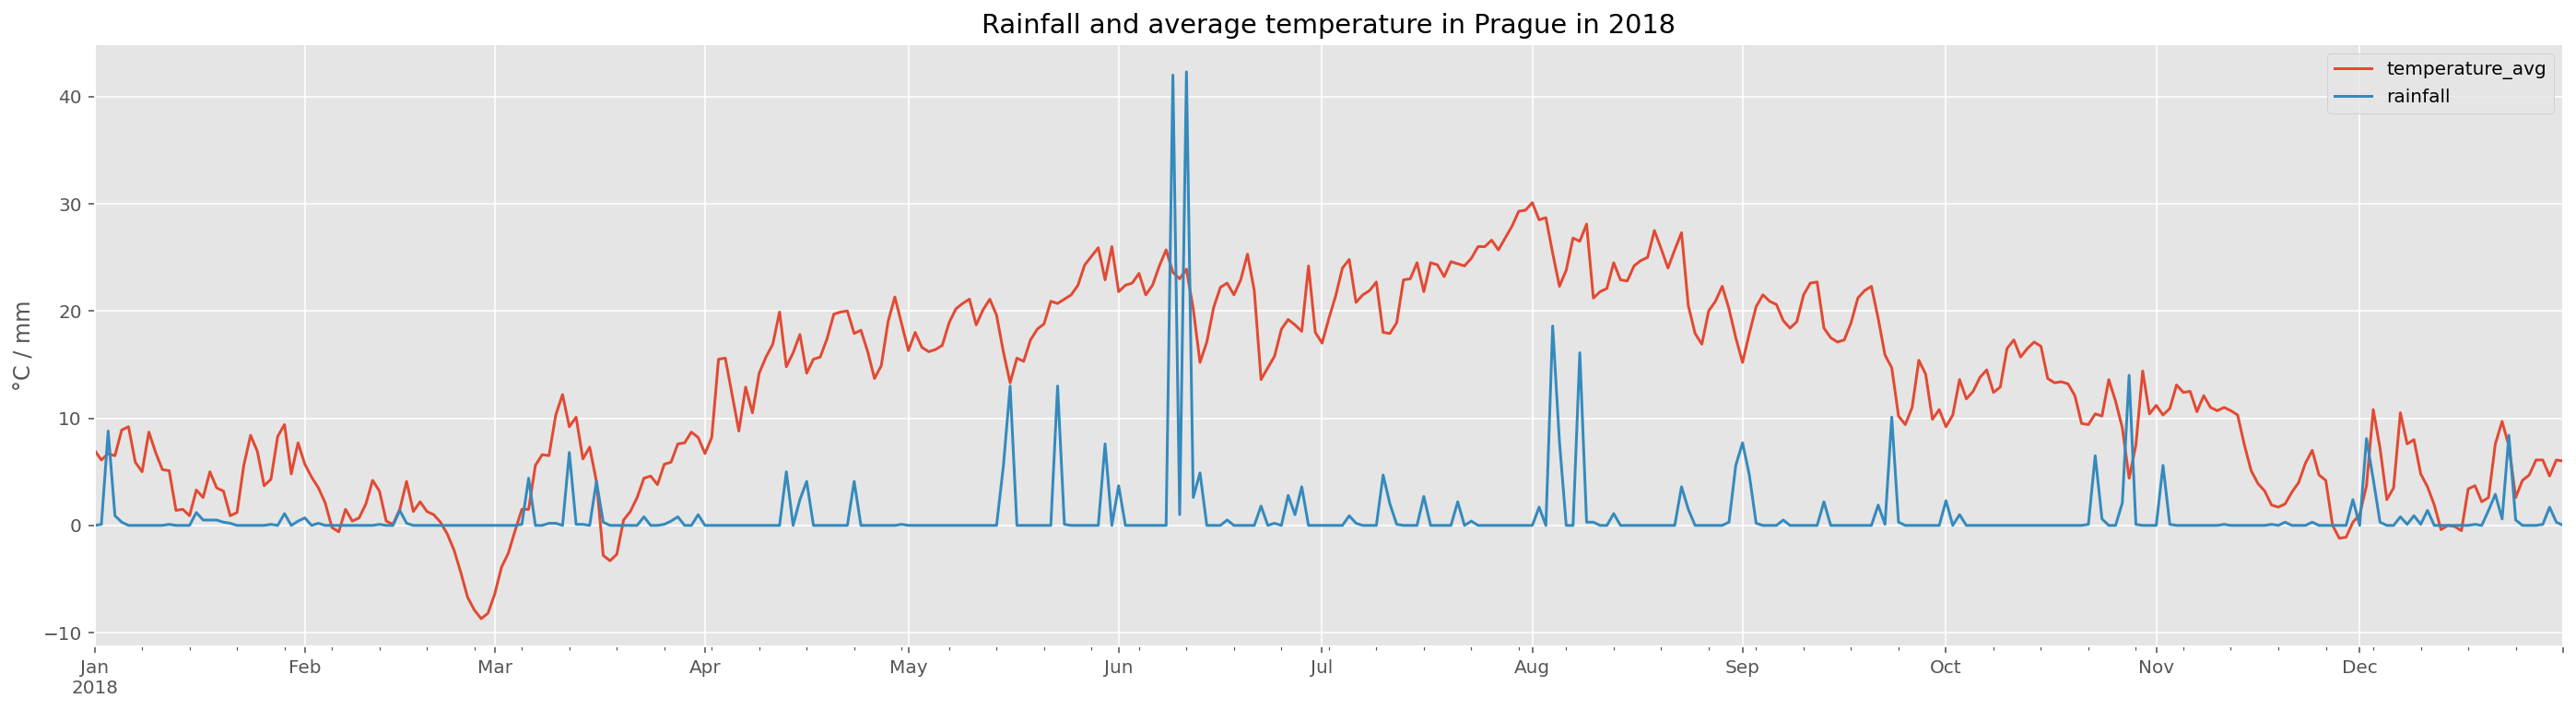

In [14]:
temperature_rainfall_2018.plot(title='Rainfall and average temperature in Prague in 2018');
plt.ylabel("°C / mm");

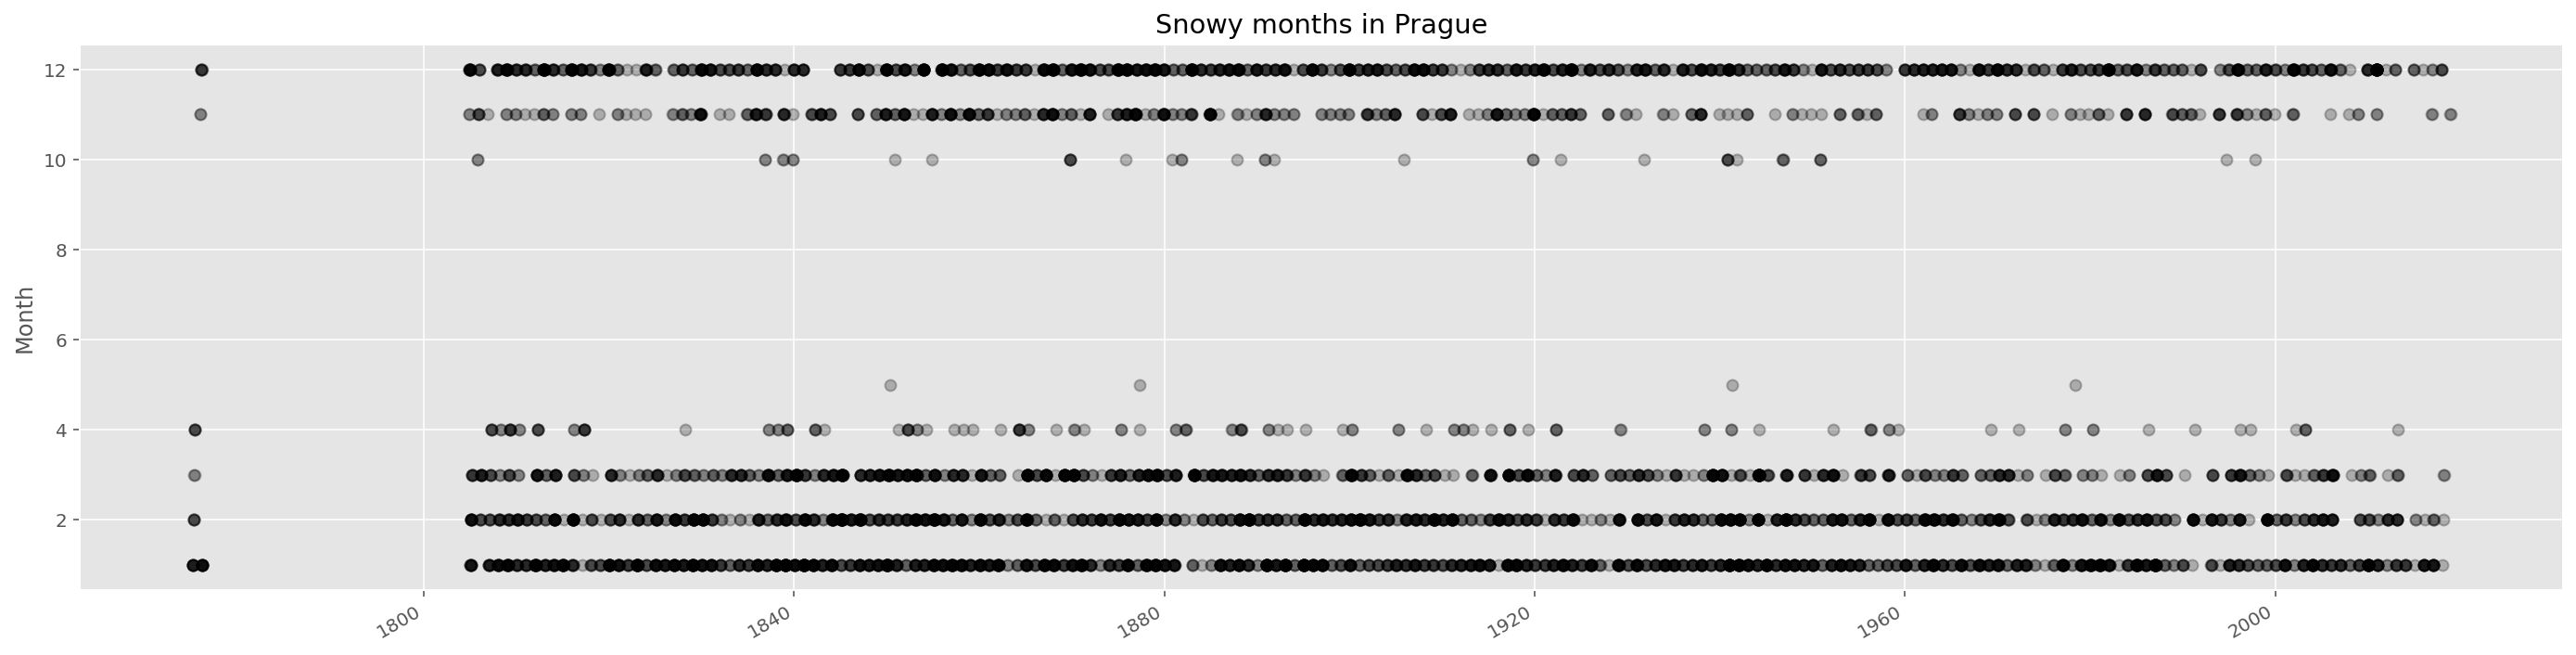

In [15]:
rained = temperature_cleaned['rainfall'] > 0
above_zero = temperature_cleaned['temperature_min'] > 0

snow_days = temperature_cleaned.loc[rained & ~above_zero]

snow_days['month'].plot(title="Snowy months in Prague", marker='o', linestyle='None', alpha=0.25, color='black');
plt.ylabel("Month");

In [16]:
unsorted_letters = pd.DataFrame(data=['A', 'B', 'C', 'D', 'E'], index=[4, 5, 1, 2, 3], columns=['letters'])
unsorted_letters

,letters
4,A
5,B
1,C
2,D
3,E


In [17]:
unsorted_letters.loc[:2]

,letters
4,A
5,B
1,C
2,D


In [18]:
unsorted_letters.iloc[:2]

,letters
4,A
5,B


In [19]:
letter_index = unsorted_letters.reset_index().set_index('letters')
letter_index

,index
letters,
A,4
B,5
C,1
D,2
E,3


In [20]:
letter_index.iloc[:2]

,index
letters,
A,4
B,5


In [21]:
letter_index.loc[:2]

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [2] of <class 'int'>

In [22]:
letter_index.loc[:'B']

,index
letters,
A,4
B,5


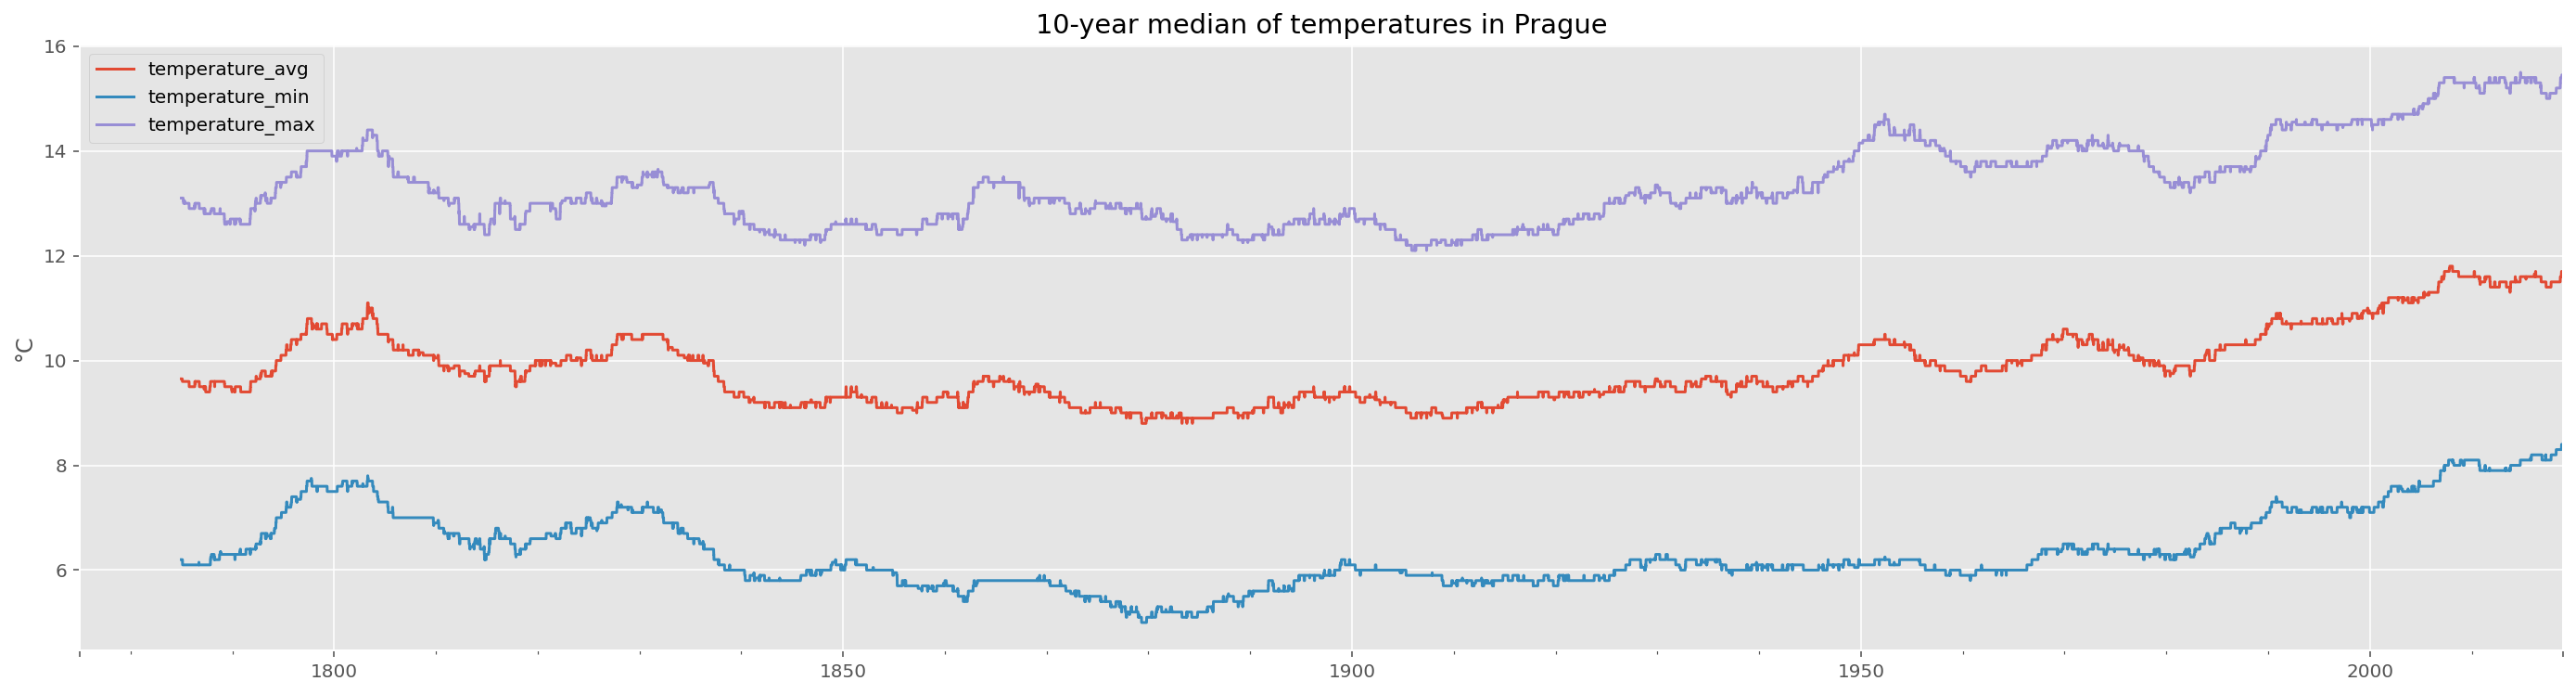

In [23]:
temperature_cleaned[['temperature_avg', 'temperature_min', 'temperature_max']].rolling(window=10*365).median().plot(title="10-year median of temperatures in Prague");
plt.ylabel('°C');

In [24]:
# providing a list of values
unsorted_letters["small_letters"] = ['a', 'b', 'c', 'd', 'e']
unsorted_letters

,letters,small_letters
4,A,a
5,B,b
1,C,c
2,D,d
3,E,e


In [25]:
# vectorized calculation
unsorted_letters["both_letters"] = unsorted_letters['letters'] + unsorted_letters['small_letters']
unsorted_letters

,letters,small_letters,both_letters
4,A,a,Aa
5,B,b,Bb
1,C,c,Cc
2,D,d,Dd
3,E,e,Ee


In [26]:
# using assign method
unsorted_letters.assign(shifted=unsorted_letters['both_letters'].shift())

,letters,small_letters,both_letters,shifted
4,A,a,Aa,NaN
5,B,b,Bb,Aa
1,C,c,Cc,Bb
2,D,d,Dd,Cc
3,E,e,Ee,Dd


In [27]:
temperature_columns = ['temperature_avg', 'temperature_min', 'temperature_max']

weekday_temperature = temperature_cleaned[temperature_columns].copy()
weekday_temperature['weekday'] = weekday_temperature.index.dayofweek

weekday_temperature.head()

,temperature_avg,temperature_min,temperature_max,weekday
1775-01-02,-2.2,-5.8,-1.4,0
1775-01-03,-1.0,-2.2,0.6,1
1775-01-04,0.1,-3.6,2.5,2
1775-01-05,2.2,1.6,3.0,3
1775-01-06,3.2,1.6,4.0,4


In [28]:
weekday_temperature_grouped = weekday_temperature.groupby('weekday')
weekday_temperature_grouped

In [29]:
median_weekday_temperatures = weekday_temperature_grouped.mean()
median_weekday_temperatures

,temperature_avg,temperature_min,temperature_max
weekday,,,
0,9.764067,6.265481,13.260226
1,9.720807,6.253986,13.228097
2,9.733650,6.214076,13.236321
3,9.747035,6.262689,13.232637
4,9.735614,6.258864,13.216024
5,9.685335,6.230885,13.171141
6,9.694321,6.204077,13.202223


In [30]:
weekday_temperature_grouped.get_group(0).head()  # Monday data

,temperature_avg,temperature_min,temperature_max,weekday
1775-01-02,-2.2,-5.8,-1.4,0
1775-01-09,4.0,2.7,6.3,0
1775-01-16,0.1,-0.9,2.0,0
1775-01-23,-5.0,-7.0,-2.3,0
1775-01-30,8.5,5.7,10.5,0


In [31]:
import numpy as np

multiple_aggregation = weekday_temperature_grouped.agg({
    "temperature_avg": [np.mean],
    "temperature_min": [np.mean, np.min],
    "temperature_max": [np.mean, np.max]
})
multiple_aggregation

temperature_avg temperature_min       temperature_max      
                   mean            mean  amin            mean  amax
weekday                                                            
0              9.764067        6.265481 -27.2       13.260226  37.3
1              9.720807        6.253986 -27.6       13.228097  36.1
2              9.733650        6.214076 -26.5       13.236321  37.8
3              9.747035        6.262689 -25.4       13.232637  37.2
4              9.735614        6.258864 -27.0       13.216024  36.4
5              9.685335        6.230885 -25.8       13.171141  36.8
6              9.694321        6.204077 -27.5       13.202223  37.6

In [32]:
multiple_aggregation['temperature_min']['amin']

weekday
0   -27.2
1   -27.6
2   -26.5
3   -25.4
4   -27.0
5   -25.8
6   -27.5
Name: amin, dtype: float64

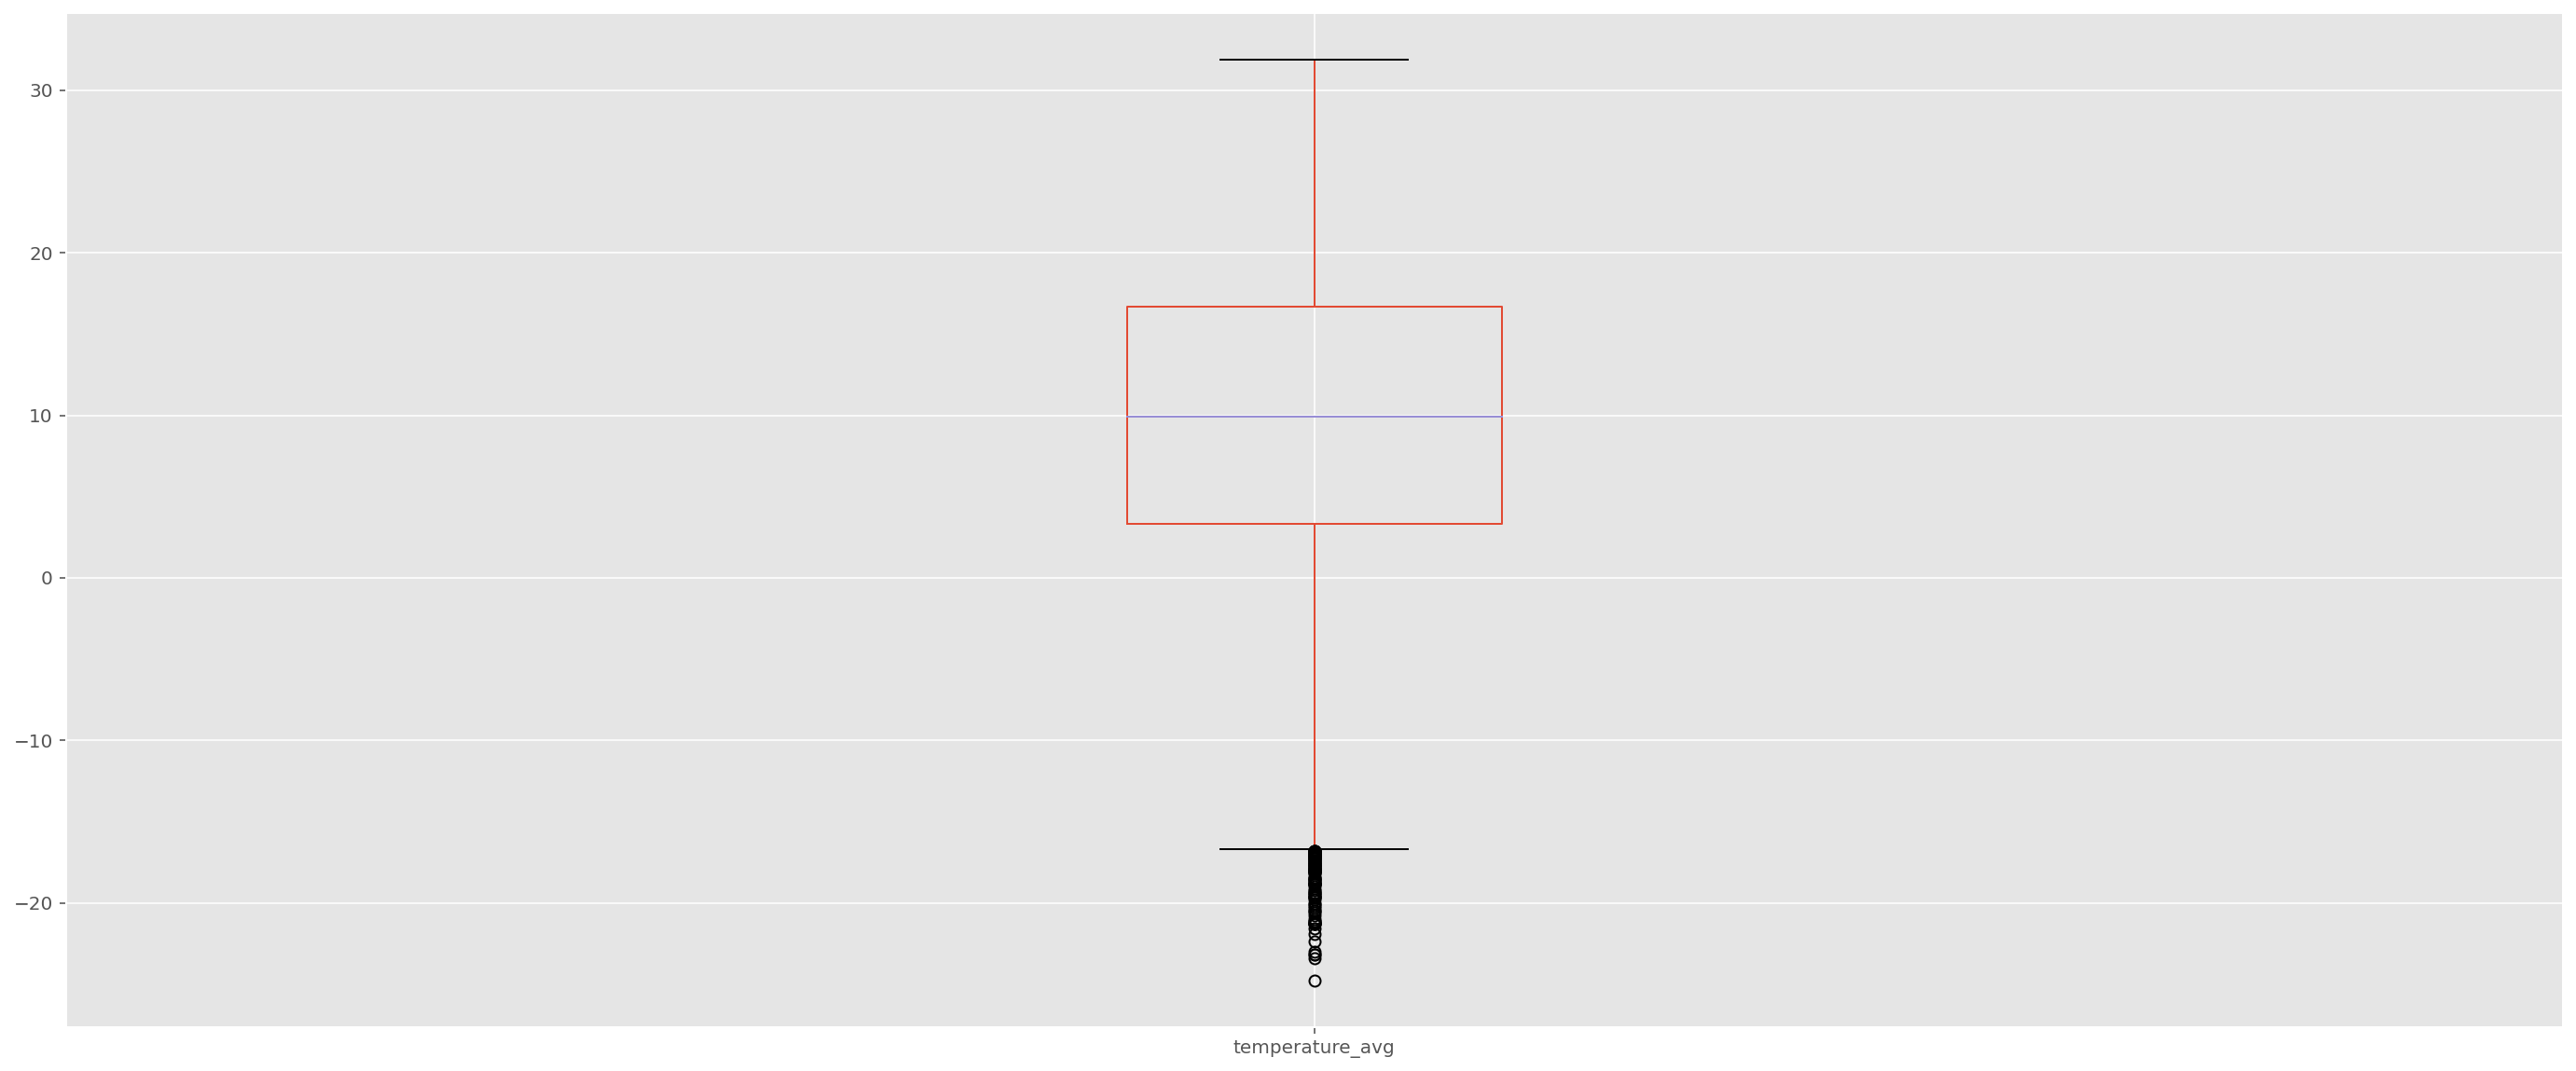

In [33]:
temperature_cleaned['temperature_avg'].plot.box(
    figsize=(24,10),
    showfliers=True
);

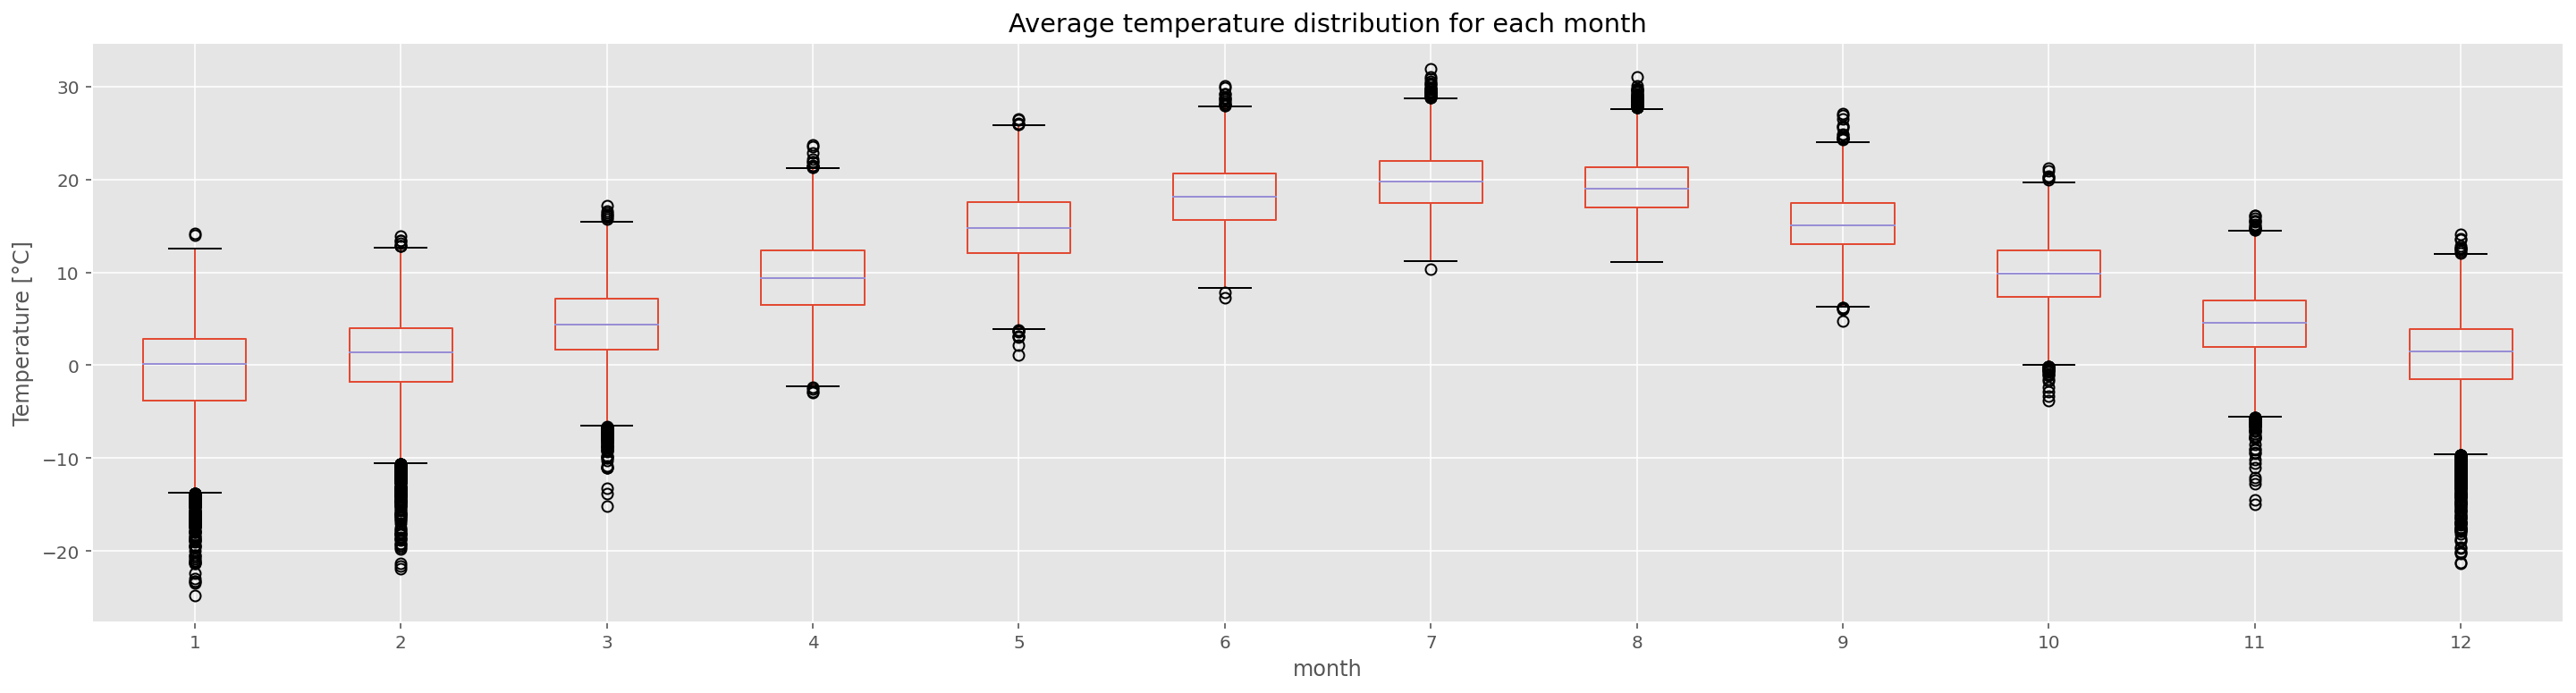

In [34]:
temperature_cleaned.boxplot(by='month', column='temperature_avg');
plt.title('Average temperature distribution for each month');
plt.suptitle('');
plt.ylabel('Temperature [°C]');

In [45]:
def min_max_scale(x: pd.Series) -> pd.Series:
    minimum = x.min()
    maximum = x.max()
    
    return (x - minimum) / (maximum - minimum)

month_temperatures = temperature_cleaned.copy()

month_temperatures['temperature_avg_scaled'] = temperature_cleaned.groupby('month').apply(min_max_scale)['temperature_avg']

month_temperatures.head()

,year,month,day,temperature_avg,temperature_max,temperature_min,rainfall,temperature_avg_scaled
1775-01-02,1775,1,2,-2.2,-1.4,-5.8,0.3,0.579487
1775-01-03,1775,1,3,-1.0,0.6,-2.2,0.0,0.610256
1775-01-04,1775,1,4,0.1,2.5,-3.6,1.2,0.638462
1775-01-05,1775,1,5,2.2,3.0,1.6,0.0,0.692308
1775-01-06,1775,1,6,3.2,4.0,1.6,0.3,0.717949


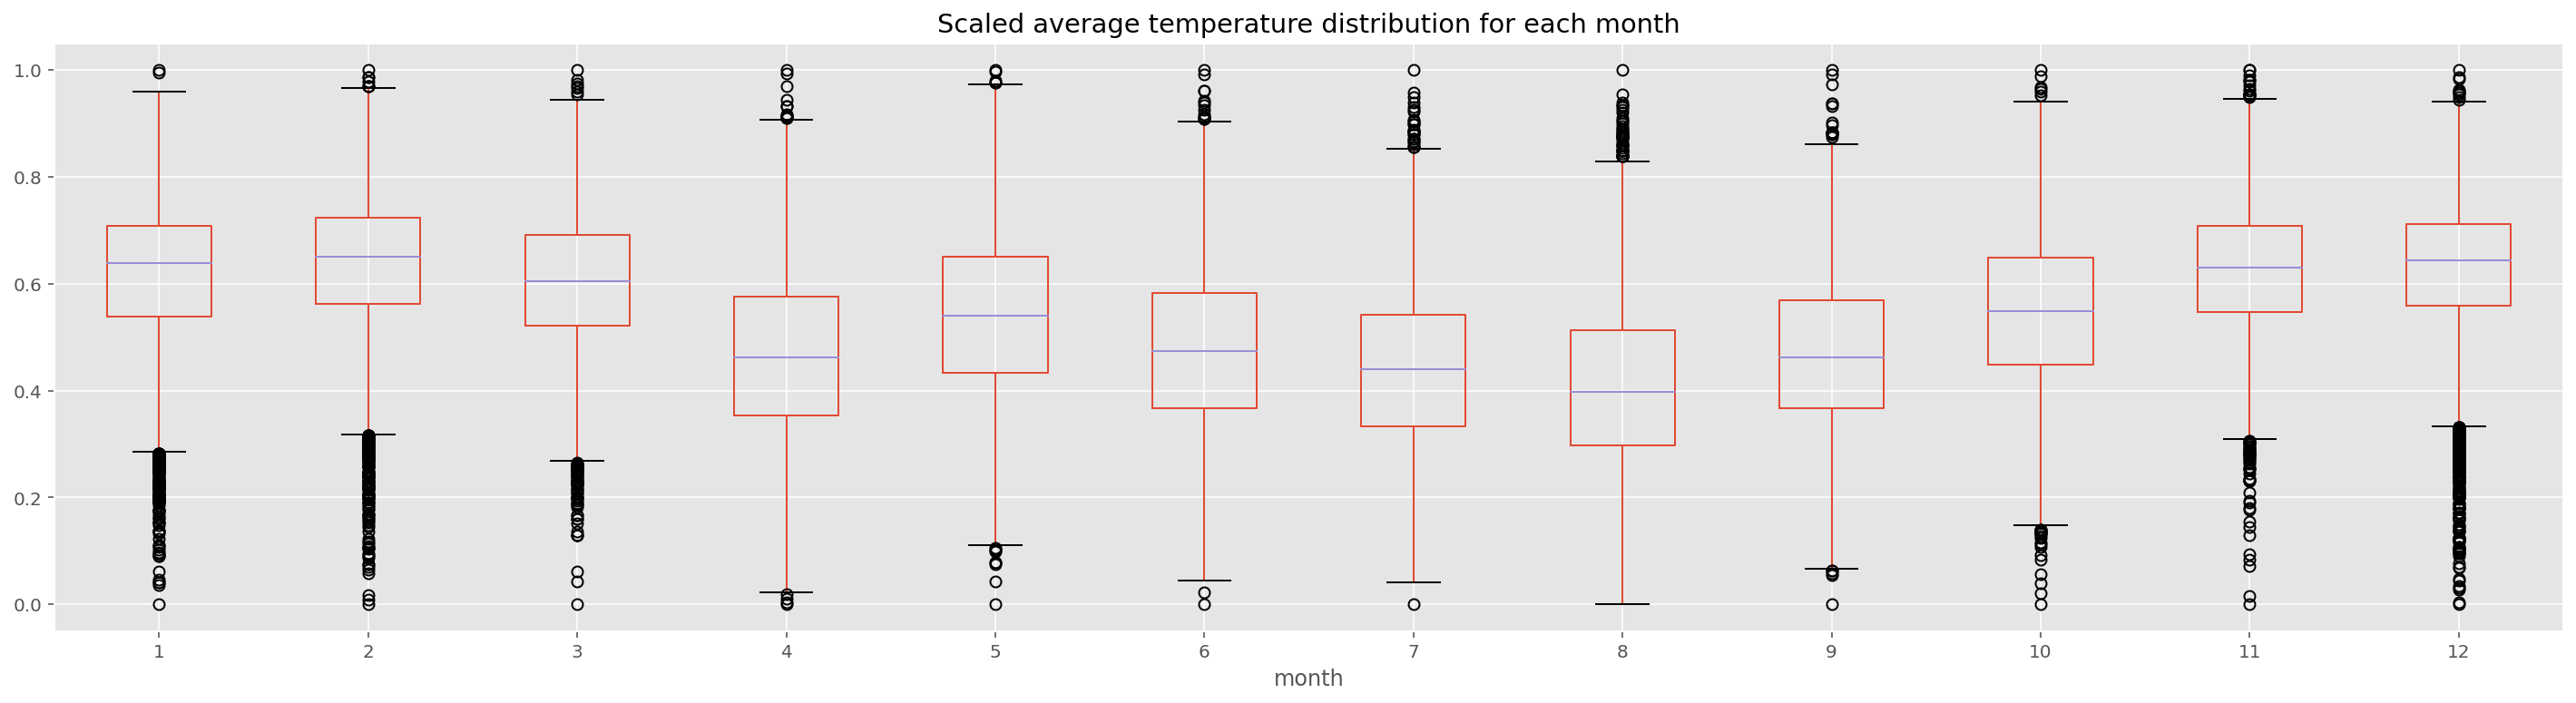

In [46]:
month_temperatures.boxplot(by='month', column='temperature_avg_scaled');
plt.title('Scaled average temperature distribution for each month');
plt.suptitle('');

In [35]:
rainfall_per_day = temperature_cleaned.groupby(['month', 'day']).mean()
rainfall_per_day

year  temperature_avg  temperature_max  temperature_min  rainfall
month day                                                                     
1     1    1897.0        -0.805761         1.346502        -2.997531  0.997196
      2    1896.5        -0.599590         1.322131        -2.922951  0.666512
      3    1896.5        -0.514754         1.478689        -2.763525  0.621860
      4    1896.5        -0.754508         1.378689        -2.842623  0.832093
      5    1896.5        -0.930738         1.047541        -3.192213  0.819535
...           ...              ...              ...              ...       ...
12    27   1896.5        -0.219672         1.709836        -2.268033  0.713426
      28   1896.5         0.031967         2.015984        -2.288934  0.974074
      29   1896.5        -0.221311         1.881148        -2.365574  0.992130
      30   1896.5        -0.288115         1.887295        -2.615164  1.011574
      31   1896.5        -0.459426         1.616393        -2.760656  0.718981

[366 rows x 5 columns]

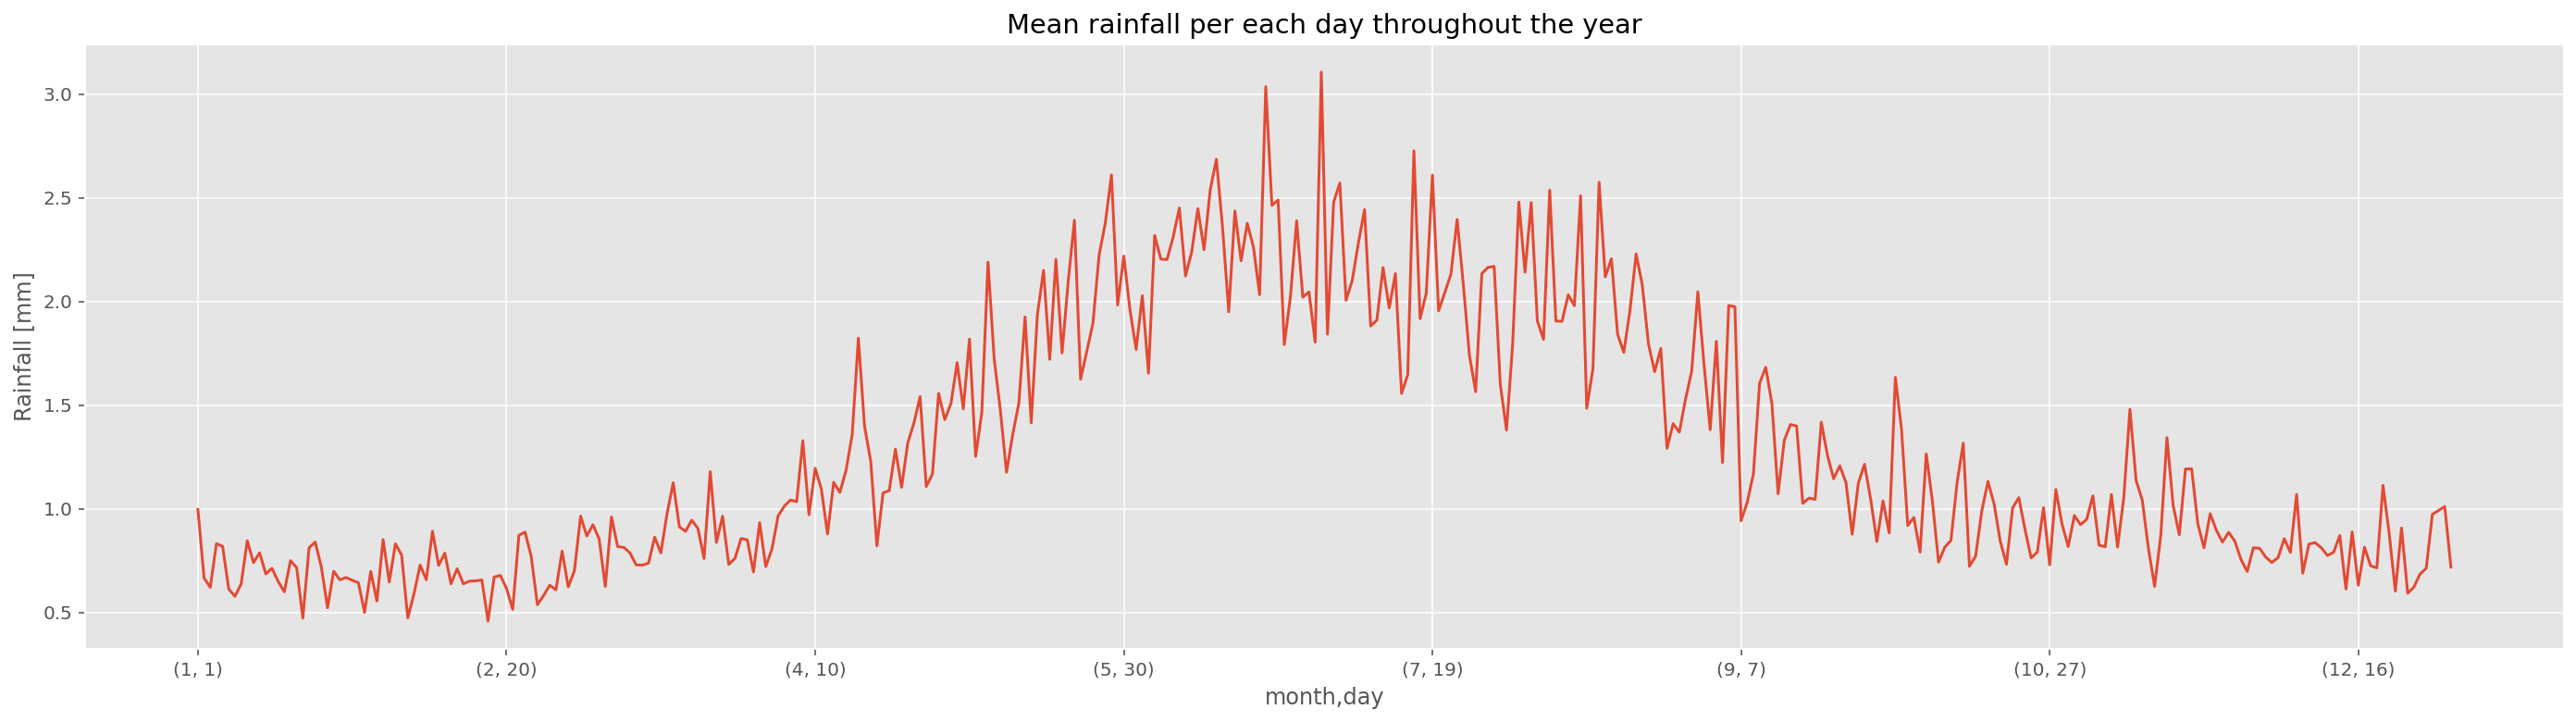

In [36]:
rainfall_per_day['rainfall'].plot(title='Mean rainfall per each day throughout the year');
plt.ylabel('Rainfall [mm]');

In [37]:
rainfall_per_day_stacked = rainfall_per_day.stack()
rainfall_per_day_stacked

month  day                 
1      1    year               1897.000000
            temperature_avg      -0.805761
            temperature_max       1.346502
            temperature_min      -2.997531
            rainfall              0.997196
                                  ...     
12     31   year               1896.500000
            temperature_avg      -0.459426
            temperature_max       1.616393
            temperature_min      -2.760656
            rainfall              0.718981
Length: 1830, dtype: float64

In [38]:
rainfall_per_day[['rainfall']].unstack()

rainfall                                                              \
day          1         2         3         4         5         6         7    
month                                                                         
1      0.997196  0.666512  0.621860  0.832093  0.819535  0.613023  0.578605   
2      0.647442  0.831628  0.777209  0.474419  0.589767  0.729302  0.658605   
3      0.623721  0.702791  0.965116  0.869302  0.923721  0.855349  0.625581   
4      0.933488  0.721860  0.806977  0.966512  1.013488  1.042791  1.034884   
5      1.430556  1.508796  1.705556  1.481944  1.818981  1.253241  1.466667   
6      1.768981  2.028241  1.654630  2.318981  2.205093  2.202315  2.311111   
7      3.106481  1.842593  2.479630  2.571759  2.006019  2.100926  2.281481   
8      1.796296  2.479630  2.141667  2.477315  1.906019  1.817593  2.537037   
9      1.696296  1.381944  1.808333  1.223611  1.981019  1.975000  0.943056   
10     0.883796  1.634722  1.383333  0.919907  0.958333  0.791667  1.265278   
11     0.924074  0.950000  1.062963  0.824537  0.817593  1.069444  0.816204   
12     0.767593  0.741667  0.765278  0.856019  0.790278  1.069907  0.689815   

                                     ...                                \
day          8         9         10  ...        22        23        24   
month                                ...                                 
1      0.637674  0.846512  0.740930  ...  0.523364  0.699533  0.657944   
2      0.892558  0.727907  0.786512  ...  0.872558  0.888372  0.769767   
3      0.961395  0.818140  0.814419  ...  0.906047  0.760930  1.179535   
4      1.329302  0.971628  1.195814  ...  1.087907  1.288372  1.104186   
5      2.189815  1.723611  1.475463  ...  2.392130  1.625463  1.758796   
6      2.451389  2.123611  2.238889  ...  3.036111  2.463889  2.489815   
7      2.443519  1.881944  1.910648  ...  2.132870  2.395833  2.084259   
8      1.906019  1.904630  2.032870  ...  2.079630  1.794907  1.661574   
9      1.031481  1.168981  1.605093  ...  1.145370  1.207870  1.126852   
10     1.037500  0.743056  0.815278  ...  1.054167  0.901389  0.763426   
11     1.053241  1.480093  1.137037  ...  0.976852  0.897222  0.840278   
12     0.830556  0.837037  0.812500  ...  0.603241  0.907870  0.593056   

                                                                             
day          25        26        27        28        29        30        31  
month                                                                        
1      0.669159  0.655607  0.643925  0.500935  0.698598  0.555607  0.852336  
2      0.538140  0.581860  0.632093  0.609302  0.796154       NaN       NaN  
3      0.838140  0.964651  0.732558  0.760930  0.857209  0.850698  0.695814  
4      1.317674  1.414419  1.541395  1.107907  1.168372  1.557674       NaN  
5      1.895833  2.224074  2.377778  2.610648  1.983333  2.218981  1.960648  
6      1.792130  2.025000  2.389352  2.021296  2.046296  1.804167       NaN  
7      1.739815  1.565278  2.134722  2.164815  2.169444  1.599074  1.380093  
8      1.774074  1.292130  1.411111  1.370370  1.528704  1.663889  2.047222  
9      0.877778  1.124537  1.215278  1.046759  0.842593  1.038426       NaN  
10     0.792130  1.005556  0.730556  1.093519  0.926389  0.818519  0.968056  
11     0.887037  0.843981  0.755556  0.698148  0.812500  0.810185       NaN  
12     0.623148  0.685648  0.713426  0.974074  0.992130  1.011574  0.718981  

[12 rows x 31 columns]

In [39]:
temperature_heatmap = temperature_cleaned.pivot_table(values='temperature_avg', index='day', columns='month', aggfunc=np.mean)
temperature_heatmap

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1,-0.805761,-0.064754,2.246311,7.203689,12.406967,16.937295,19.020902,20.388934,17.222131,12.951639,6.960246,2.334836
2,-0.599590,0.172541,2.347541,7.512295,12.700820,17.350000,19.048361,20.379098,17.214754,12.800000,6.704098,2.228279
3,-0.514754,0.362705,2.506148,7.702049,12.701639,17.575820,19.354918,20.297541,17.316803,12.558607,6.640984,2.018033
4,-0.754508,0.356967,2.617623,7.793033,12.957377,17.712295,19.577459,20.107377,17.087295,12.257787,6.583197,2.131967
5,-0.930738,0.362705,2.688934,7.747131,13.020492,17.730328,19.468852,20.059016,16.818033,12.059016,6.315164,2.254508
6,-0.876230,0.340574,2.909836,7.870082,13.394672,17.715164,19.454918,20.143033,16.852869,12.031967,6.033197,2.207787
7,-0.992213,0.258607,3.079918,8.199590,13.705328,17.880738,19.536475,19.927459,16.801230,11.875820,5.952869,1.958607
8,-1.021311,0.392213,3.221721,8.150410,13.913115,17.926230,19.650820,19.997951,16.642213,11.678279,5.909426,1.729508
9,-1.178689,0.369262,3.384016,8.293033,14.000410,18.079098,19.597541,19.738525,16.384836,11.395492,5.590984,1.463934


In [40]:
temperature_heatmap.style.background_gradient(cmap='BuPu', axis='columns')

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1,-0.805761,-0.064754,2.246311,7.203689,12.406967,16.937295,19.020902,20.388934,17.222131,12.951639,6.960246,2.334836
2,-0.599590,0.172541,2.347541,7.512295,12.700820,17.350000,19.048361,20.379098,17.214754,12.800000,6.704098,2.228279
3,-0.514754,0.362705,2.506148,7.702049,12.701639,17.575820,19.354918,20.297541,17.316803,12.558607,6.640984,2.018033
4,-0.754508,0.356967,2.617623,7.793033,12.957377,17.712295,19.577459,20.107377,17.087295,12.257787,6.583197,2.131967
5,-0.930738,0.362705,2.688934,7.747131,13.020492,17.730328,19.468852,20.059016,16.818033,12.059016,6.315164,2.254508
6,-0.876230,0.340574,2.909836,7.870082,13.394672,17.715164,19.454918,20.143033,16.852869,12.031967,6.033197,2.207787
7,-0.992213,0.258607,3.079918,8.199590,13.705328,17.880738,19.536475,19.927459,16.801230,11.875820,5.952869,1.958607
8,-1.021311,0.392213,3.221721,8.150410,13.913115,17.926230,19.650820,19.997951,16.642213,11.678279,5.909426,1.729508
9,-1.178689,0.369262,3.384016,8.293033,14.000410,18.079098,19.597541,19.738525,16.384836,11.395492,5.590984,1.463934


In [41]:
row_size = 50000

numbers = pd.DataFrame.from_dict({'numbers': range(row_size)})
numbers

,numbers
0,0
1,1
2,2
3,3
4,4
...,...
49995,49995
49996,49996
49997,49997
49998,49998


In [42]:
%%timeit -r 3 -n 2

summed_columns = numbers.numbers + 1

248 µs ± 127 µs per loop (mean ± std. dev. of 3 runs, 2 loops each)
